# Generating idioms using a basic Markov chain approach

In [10]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

speechfile = open("ProverbList.txt",'r')
a = speechfile.read().lower()
words = a.replace("\n\n"," ").split(' ')

gatsby = open("gatsby.txt",'r')
a = gatsby.read()
gatsby_words = a.lower().replace("\n", " ").replace("\"","").replace(".","").replace(",","").replace('--'," ").replace("\r", " ").replace("  ", " ").replace("  ", " ").split(' ')
#gatsby_words = [ word for word in gatsby_words if "\'" not in word ]

words += words + gatsby_words

print len(words), " words"
print len(set(words)), " unique words"

56583  words
6956  unique words


In [4]:
n = 2+1
n_grams = list(set([ tuple(words[i:i+n]) for i in range(len(words)-n) ]))

markov_dict = {}
for i in range(len(n_grams)):
    if n_grams[i][0:n-1] in markov_dict:
        markov_dict[n_grams[i][0:n-1]] += [n_grams[i][-1]]
    else:
        markov_dict[n_grams[i][0:n-1]] = [n_grams[i][-1]]

n_gram_freq = [ len(markov_dict[key]) for key in markov_dict.keys() ]

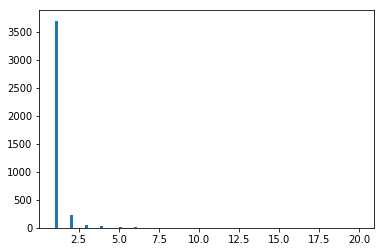

In [5]:
plt.hist(n_gram_freq,bins=100);

In [349]:
x = np.random.choice(range(len(n_grams)))
idiom = [] + list(n_grams[x])
idiom + [np.random.choice(list(markov_dict[n_grams[x][0:n-1]]))]

for i in range(25):
    idiom += [np.random.choice(markov_dict[tuple(idiom[-(n-1):])])]
' '.join(idiom)

"in the spring of twenty-two the practical thing was to find a way where there's muck there's brass while there's life there's hope whom the gods love die"